<a href="https://colab.research.google.com/github/hyeonjun/AlphaZero/blob/master/6_2_Dual_Network_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 듀얼 네트워크 구성

알파제로에서는 현재 국면에 대해 정책, 가치의 2개 값을 출력하는 '듀얼 네트워크'를 사용한다. 먼저, ResNet의 레지듀얼 블록으로 게임 화면의 특징을 추추랗고, 마지막으로 '정책 출력'과 '가치 출력'의 두 가지로 분리시켜 정책(다음 한 수)과 가치(승패 예측) 두 가지를 추론한다.

ResNet과 같은 컨볼루셔널 뉴럴 네트워크는 이미지 인식 분야에서 보다 높은 성능을 발휘하는 듀얼 네트워크다. 알파제로에서는 이 뉴럴 네트워크의 입력으로 이미지가 아닌 게임의 보드면을 사용한다. 이미지와 게임의 보드면은 모두 가로세로 방향의 정보 나열에 의미가 있으므로 컨볼루셔널 뉴럴 네트워크를 활용해 특징을 추출하기에 적합하다.

* 네트워크 구조

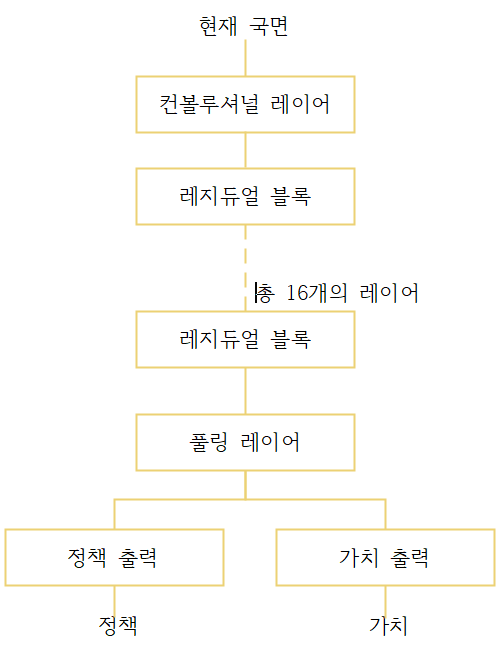

* **듀얼 네트워크의 입력**

듀얼 네트워크의 입력은 게임의 보드면이다. 3-4 'ResNet를 활용한 이미지 분류'에서는 컬러 이미지를 RGB 3개의 2차원 배열로 입력했지만, 여기서는 게임의 보드면을 '자신의 돌의 위치'와 '상대방의 돌의 위치' 2개의 2차원 배열로 입력한다.

구체적으로는 3 * 3의 2차원 배열 2개 입력 형태는 (3,3,2)로 돌이 놓여져 있으면 1, 아니면 0이다.

---

듀얼 네트워크의 입력
- 자신의 돌의 위치(3 x 3의 2차원 배열)
- 상대방의 돌의 위치(3 x 3의 2차원 배열)

---

듀얼 네트워크의 입력 예시는 아래와 같다.

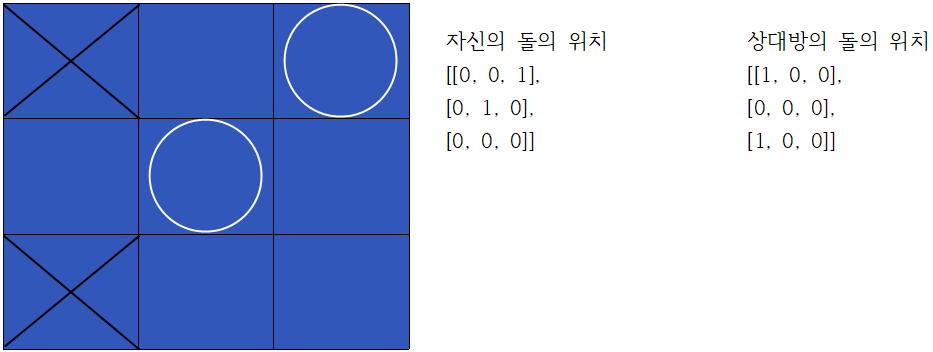

* **듀얼 네트워크의 출력**

듀얼 네트워크는 정책과 가치를 출력한다. 정책은 다음 한 수의 확률 분포이며, 행동의 수가 9이므로 길이가 9인 배열을 반환한다. 가치는 현재 국면에서의 승리 예측으로 0~1의 값이므로 길이 1인 배열을 반환한다.

듀얼 네트워크의 출력
* 정책(엘리먼트 수가 9이고, 엘리먼트 값의 합계가 1인 배열)
* 가치(0~1의 값을 가진 길이 1인 배열)

듀얼 네트워크의 출력 예는 아래와 같다.

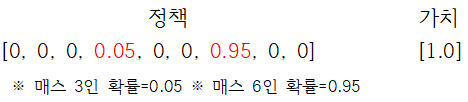

# 레지듀얼 블록 생성

레지듀얼 블록의 네트워크의 구성을 아래와 같다.

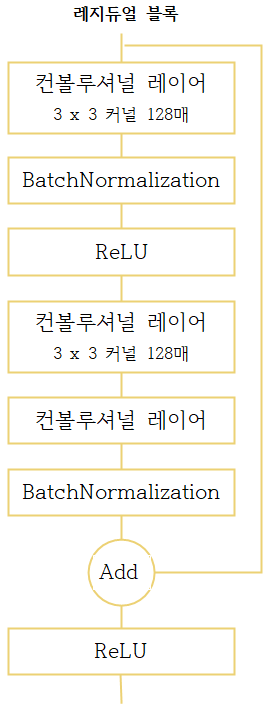

# 듀얼 네트워크 생성

다음 리스트에 있는 dual_network()로 듀얼 네트워크를 생성한다.

1. 모델 생성을 완료한 경우 아무 처리도 하지 않음

베스트 플레이어 모델(./model/best.h5)이 존재하는 경우에는 아무런 처리를 하지 않는다.

2. 모델 생성

입력 레이어, 컨볼루셔널 레이어, 레지듀얼 * 16, 풀링 레이어, 정책 출력, 가치 출력, 모델 순서로 생성한다.

3. 모델 저장

model 폴더가 없는 경우에는 새롭게 폴더를 만든 뒤, 베스트 플레이어의 모델(./model/best.h5)을 저장한다.

4. 모델 삭제

모델의 세션과 메모리를 파기한다. K.clear_session()으로 세션을, del_model로 메모리를 파기한다.

---
# 오리지널 알파제로의 네트워크 구조

* 컨볼루셔널 레이어

컨볼루셔널 레이어 (3 x 3 커널 256 매, Batch Normalization, ReLU)

* 레지듀얼 블록

레지듀얼 블록 (19 개)

* 정책 출력

컨볼루셔널 레이어 (1 x 1 커널 2매, Batch Normalization, ReLU)

전결합 레이어(362 유닛)

* 가치 출력

컨볼루셔널 레이어 (1 x 1 커널 1매, Batch Normalization, ReLU)

전결합 레이어 (256 유닛, ReLU)

전결합 레이어 (1 유닛, tanh)

---

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!python ./drive/MyDrive/알파제로/AlphaZero/dual_network.py

2021-04-10 13:50:22.228863: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2021-04-10 13:50:24.483280: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-04-10 13:50:24.506932: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2021-04-10 13:50:24.574026: E tensorflow/stream_executor/cuda/cuda_driver.cc:328] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-04-10 13:50:24.574098: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (def48a30773d): /proc/driver/nvidia/version does not exist
2021-04-10 13:50:24.574640: I tensorflow/compiler/jit/xla_gpu_device.cc:99] Not creating XLA devices, tf_xla_enable_xla_devices not set


In [ ]:
from google.colab import files
upload = files.upload()

!dir

Saving dual_network.py to dual_network.py
drive  dual_network.py	model  sample_data


In [ ]:
!python dual_network.py

!dir

!dir ./model/

2021-04-10 13:53:35.902291: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
drive  dual_network.py	model  sample_data
best.h5
